In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd 
import numpy as np
import h5py
import sys
sys.path.append('/home/jma819/post_cmfe_analysis')
import python_utils_jjm as utils_jjm
import dlc_utils
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy import stats

In [2]:
##wt files 
wt_sessions = ['GRIN039_H14_M8_S53','GRIN039_H12_M33_S29', 'GRIN039_H12_M26_S54', 'GRIN013_H13_M33_S54', 'GRIN027_H13_M29_S44', 'GRIN033_H14_M34_S32', 'GRIN033_H13_M42_S33',
 'GRIN032_H17_M30_S22', 'GRIN034_H15_M28_S2', 'GRIN026_H16_M35_S34', 'GRIN032_H16_M49_S22', 'GRIN034_H16_M13_S22', 'GRIN034_H19_M0_S18',
 'GRIN035_H13_M50_S58', 'GRIN035_H13_M31_S20', 'GRIN035_H14_M40_S34']

#ko files'GRIN038_H13_M37_S23'
ko_sessions = ['GRIN011_H10_M19_S59', 'GRIN041_H12_M54_S49', 'GRIN009_H13_M59_S14', 'GRIN038_H15_M39_S40', 'GRIN038_H11_M57_S0', 'GRIN038_H13_M37_S23',  
               'GRIN018_H17_M41_S43', 'GRIN018_H16_M13_S53', 'GRIN012_H17_M46_S35', 'GRIN012_H17_M32_S17', 'GRIN012_H16_M57_S23']

In [3]:
#need to get keys first from all session dataframes to read into pandas 
h5file=pd.HDFStore('/projects/b1118/miniscope/analysis/event_analysis/mm_tracking_output/movement_regions_for_display.h5')
keys=h5file.keys()
h5file.close()

In [4]:
keys

['/GRIN009_H13_M59_S14',
 '/GRIN011_H10_M19_S59',
 '/GRIN012_H16_M57_S23',
 '/GRIN012_H17_M32_S17',
 '/GRIN013_H13_M33_S54',
 '/GRIN018_H16_M13_S53',
 '/GRIN018_H17_M41_S43',
 '/GRIN027_H13_M29_S44',
 '/GRIN032_H17_M30_S22',
 '/GRIN033_H13_M42_S33',
 '/GRIN033_H14_M34_S32',
 '/GRIN034_H15_M28_S2',
 '/GRIN034_H16_M13_S22',
 '/GRIN034_H19_M0_S18',
 '/GRIN035_H13_M31_S20',
 '/GRIN035_H13_M50_S58',
 '/GRIN035_H14_M40_S34',
 '/GRIN038_H11_M57_S0',
 '/GRIN038_H13_M37_S23',
 '/GRIN038_H15_M39_S40',
 '/GRIN039_H12_M26_S54',
 '/GRIN039_H12_M33_S29',
 '/GRIN039_H14_M8_S53',
 '/GRIN041_H12_M54_S49']

In [5]:
#load fluorescence in event regions
z_scored_events_by_session = {key_idx.strip('/'):pd.read_hdf('/projects/b1118/miniscope/analysis/event_analysis/mm_tracking_output/movement_regions_for_display.h5', key=key_idx) for key_idx in keys}

In [6]:
z_scored_movement_regions_by_session = {session:z_scored_events_by_session[session].loc['z_scored_movement_regions'] for session in list(z_scored_events_by_session.keys())}

In [7]:
#load velocity data 
velocity_data = pd.read_hdf('/projects/b1118/miniscope/analysis/event_analysis/compiled_velocity_all_sessions.h5')

In [8]:
session = list(z_scored_events_by_session.keys())[1]
print(session)
#z_scored_movement_regions_by_session[session]

GRIN011_H10_M19_S59


In [9]:
start_indicies=utils_jjm.return_list_of_level_indicies_in_session(z_scored_events_by_session[session].loc['z_scored_movement_regions'],0)
stop_indicies=utils_jjm.return_list_of_level_indicies_in_session(z_scored_events_by_session[session].loc['z_scored_movement_regions'],1)
bounds = [(start, stop) for start, stop in zip(start_indicies, stop_indicies)]
bounds[0:10]

[(Timedelta('0 days 00:00:07.400000'), Timedelta('0 days 00:00:17.400000')),
 (Timedelta('0 days 00:00:12'), Timedelta('0 days 00:00:22')),
 (Timedelta('0 days 00:00:20.800000'), Timedelta('0 days 00:00:30.800000')),
 (Timedelta('0 days 00:00:27.600000'), Timedelta('0 days 00:00:37.600000')),
 (Timedelta('0 days 00:00:36.400000'), Timedelta('0 days 00:00:46.400000')),
 (Timedelta('0 days 00:00:41.400000'), Timedelta('0 days 00:00:51.400000')),
 (Timedelta('0 days 00:00:46.200000'), Timedelta('0 days 00:00:56.200000')),
 (Timedelta('0 days 00:00:53.800000'), Timedelta('0 days 00:01:03.800000')),
 (Timedelta('0 days 00:01:07.600000'), Timedelta('0 days 00:01:17.600000')),
 (Timedelta('0 days 00:01:30.800000'), Timedelta('0 days 00:01:40.800000'))]

In [10]:
z_scored_movement_regions_by_session[session].loc[bounds[0][0]].loc[bounds[0][1]]

,1,2,3,4,5,6,7,8,9,10,...,252,253,254,255,257,259,260,261,263,264
0,0.072792,0.924623,-0.176553,0.826352,0.361737,0.379669,-0.345394,0.438575,-0.200372,-0.348340,...,0.844696,-0.172287,-0.153542,-0.977717,-0.302486,-0.395188,-0.770981,0.008275,-0.418252,-1.131103
1,0.031459,0.786521,-0.225635,0.867220,0.499870,0.304116,-0.372827,0.678984,-0.246418,-0.348371,...,0.748812,-0.221522,0.206662,-0.979758,-0.269485,-0.395538,-0.770981,-0.042762,-0.389551,-1.131103
2,0.029931,0.809872,-0.050346,0.642724,0.417224,0.369932,-0.272016,0.513451,-0.288341,-0.348400,...,0.659362,-0.266329,0.107814,-0.981656,-0.256994,-0.395851,-0.770981,-0.087802,-0.393364,-1.131103
3,-0.009119,0.680608,-0.112675,0.587615,0.340618,0.295078,-0.308889,0.368531,-0.326510,-0.348427,...,0.575913,-0.057713,0.019279,-0.983419,-0.286053,-0.396131,-0.770981,-0.127550,-0.362183,-1.131103
4,0.132203,0.561300,-0.168461,0.754628,0.269610,0.495473,-0.341018,0.241658,-0.293419,-0.348452,...,0.839397,-0.117252,-0.060019,-0.985059,-0.311103,-0.396382,-0.770981,-0.162628,-0.369633,-1.131103
5,0.087704,1.054556,-0.218393,0.545149,0.269768,0.411600,-0.369014,0.756012,-0.331134,-0.348476,...,0.743868,0.292811,-0.131044,-0.986582,-0.332699,-0.396606,-0.770981,-0.193585,-0.376093,-1.131103
6,0.045576,0.906447,-0.263084,0.647914,0.423596,0.333753,-0.361256,0.643078,0.080243,-0.348498,...,0.654750,0.201748,0.195389,-0.987999,-0.295960,-0.396806,-0.770981,-0.220904,-0.381695,-1.131103
7,0.005693,0.907075,-0.185138,0.452668,0.417827,0.442977,-0.332164,0.853408,0.009072,-0.348520,...,0.571611,0.118875,0.097717,-0.989315,-0.319645,-0.396986,-0.770981,-0.245014,-0.319919,-1.131103
8,-0.032065,0.770325,-0.233319,0.544992,0.447857,0.362876,-0.331654,0.666155,-0.055727,-0.348539,...,0.596212,0.431162,0.010236,-0.990539,-0.340063,-0.397146,-0.770981,-0.266291,-0.332985,-1.131103
9,-0.067811,0.644107,-0.058150,0.801835,0.369012,0.341908,-0.324567,0.692724,-0.114724,-0.348558,...,0.775777,0.327657,-0.068119,-0.991676,-0.316014,-0.396586,-0.770981,-0.285068,-0.344315,-1.131103


In [11]:
##to plot heatmap
# sort cells by peak latency for heatmap 
def return_cells_sorted_by_peak_latency_mm(sessions_to_plot, z_scored_events_by_session, sample_bounds, z_score_threshold, range_scale_twice):
    
    # average each cells response across events within a session
    #filter by z score here 
    events_by_cell = pd.concat([z_scored_events_by_session[session].unstack(level=[0, 1]) for session in
                            sessions_to_plot], axis=1, keys=sessions_to_plot).iloc[sample_bounds[0]:sample_bounds[1]]
    events_by_cell_thresholded = events_by_cell[[column for column in (events_by_cell>2.5).any(0)[(events_by_cell>z_score_threshold).any(0)].index]]
    #range scale
    scaler = MinMaxScaler()
    if range_scale_twice==True:
        events_scaled = pd.DataFrame(scaler.fit_transform(events_by_cell), columns=events_by_cell.columns)
        #average by cell
        events_scaled_mean = events_scaled.groupby(level=[0, 1], axis=1).mean()
    else:
        events_scaled_mean = events_by_cell_thresholded.groupby(level=[0, 1], axis=1).mean()
    
    #sort by latency 
    sorted_by_latency = list(events_scaled_mean.idxmax(axis=0).sort_values().index)
    session_means_by_cell_sorted_by_latency=events_scaled_mean[sorted_by_latency]
    
    rescaled = pd.DataFrame(scaler.fit_transform(session_means_by_cell_sorted_by_latency), 
                        columns=session_means_by_cell_sorted_by_latency.columns)
    
    return(rescaled)

In [12]:
#events_by_cell = pd.concat([z_scored_events_by_session[session].loc['z_scored_movement_regions'].unstack(level=[0, 1]) for session in
#                            sessions_to_plot], axis=1, keys=sessions_to_plot).iloc[sample_bounds[0]:sample_bounds[1]]
#events_by_cell_thresholded = events_by_cell[[column for column in (events_by_cell>2.5).any(0)[(events_by_cell>z_score_threshold).any(0)].index]]

In [13]:
#plt.plot(events_scaled.iloc[:,1])

In [14]:
#wt sessions 
sample_bounds = (0, 49)
z_score_threshold = 2.5
scale_twice = False
wt_sessions_to_plot = [session for session in z_scored_movement_regions_by_session.keys() if session in wt_sessions]
means_sorted_scaled_wt = return_cells_sorted_by_peak_latency_mm(wt_sessions_to_plot, z_scored_movement_regions_by_session, 
                                                             (sample_bounds[0],sample_bounds[1]), z_score_threshold, scale_twice)
#ko sessions 
ko_sessions_to_plot = [session for session in z_scored_movement_regions_by_session.keys() if session in ko_sessions]
means_sorted_scaled_ko = return_cells_sorted_by_peak_latency_mm(ko_sessions_to_plot, z_scored_movement_regions_by_session, 
                                                             (sample_bounds[0],sample_bounds[1]), z_score_threshold, scale_twice)

In [15]:
#wt_sessions_to_plot

In [16]:
#means_sorted_scaled_wt

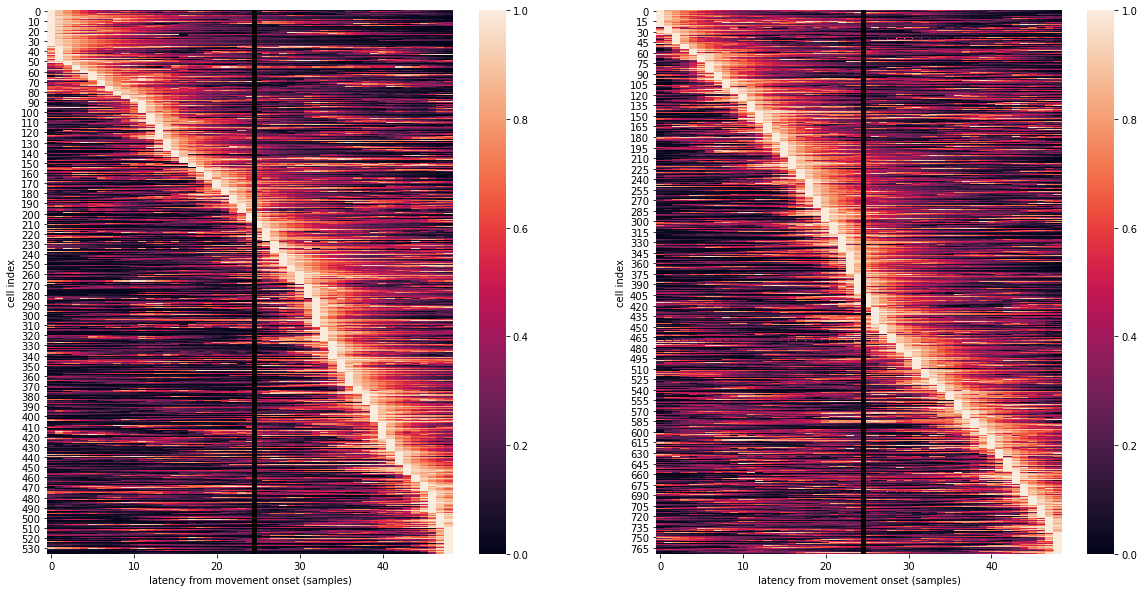

In [17]:
fig = plt.figure()
fig.set_size_inches(20, 10)
p1 = fig.add_subplot(1,2,1)
ax = sns.heatmap(means_sorted_scaled_wt.transpose().reset_index(drop=True).iloc[:, 0:100], xticklabels=10)
ax.set_ylabel('cell index')
ax.set_xlabel('latency from movement onset (samples)')
ax.axvline(x=(25), linestyle='-', lw=5, color='k')
p2 = fig.add_subplot(1,2,2)
ax = sns.heatmap(means_sorted_scaled_ko.transpose().reset_index(drop=True).iloc[:, 0:100], xticklabels=10)
ax.set_ylabel('cell index')
ax.set_xlabel('latency from movement onset (samples)')
ax.axvline(x=(25), linestyle='-', lw=5, color='k')
fig.savefig('/projects/b1118/miniscope/analysis/summaryfigures/latency_indiv_cells_sd25_mmtracking.pdf', transparent=True)
plt.show()

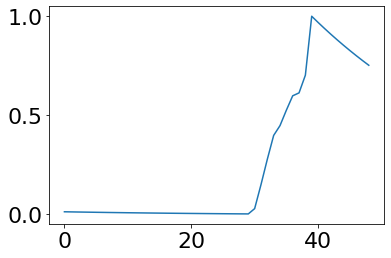

In [99]:
plt.plot(means_sorted_scaled_wt.iloc[:,400])

In [19]:
# plot cumulative histogram
cumulative_latency = stats.cumfreq(means_sorted_scaled_wt.idxmax(axis=0).values, numbins=100, defaultreallimits=(0, 50))
cumulative_latency_ko = stats.cumfreq(means_sorted_scaled_ko.idxmax(axis=0).values, numbins=100, defaultreallimits=(0, 50))

cumulative_data = cumulative_latency.cumcount/len(means_sorted_scaled_wt.idxmax(axis=0).values)
cumulative_data_ko = cumulative_latency_ko.cumcount/len(means_sorted_scaled_ko.idxmax(axis=0).values)

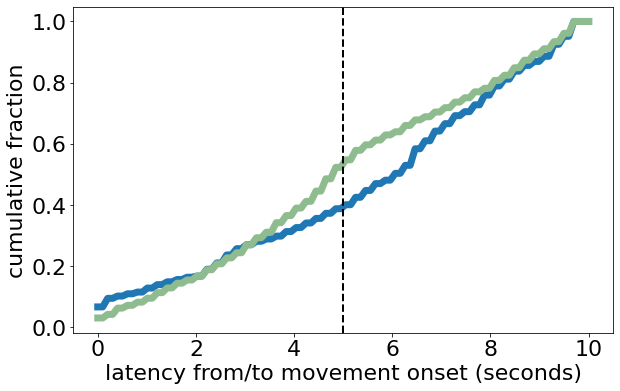

In [20]:
plt.rcParams.update({'font.size': 22})
plt.plot(np.linspace(0, 10, 100), cumulative_data, linewidth=7.0)
plt.plot(np.linspace(0, 10, 100), cumulative_data_ko, color='darkseagreen', linewidth=7.0)
#plt.xlim((-10, 10))
fig = plt.gcf()
fig.set_size_inches(10, 6)
ax = plt.gca()
ax.set_ylabel('cumulative fraction')
ax.set_xlabel('latency from/to movement onset (seconds)')
ax.axvline(x=(5), linestyle='--', lw=2, color='k')
fig.subplots_adjust(left=0.15)
fig.savefig('/projects/b1118/miniscope/analysis/summaryfigures/latency_cumulative_fraction_sd25_mmtracking.pdf', transparent=True)

In [ ]:
##get the average peak latency by session
means_sorted_scaled_ko.columns = pd.MultiIndex.from_tuples(means_sorted_scaled_ko.columns)
means_sorted_scaled_wt.columns = pd.MultiIndex.from_tuples(means_sorted_scaled_wt.columns)

In [ ]:
plt.scatter(np.concatenate((means_sorted_scaled_ko.idxmax(axis=0).mean(level=0).values, means_sorted_scaled_wt.idxmax(axis=0).mean(level=0).values)), 
            np.concatenate((np.ones(len(means_sorted_scaled_ko.idxmax(axis=0).mean(level=0).values)),
                            np.zeros(len(means_sorted_scaled_wt.idxmax(axis=0).mean(level=0).values)))))
plt.xlim((-10, 60))
plt.ylim((-1, 3))

In [ ]:
for session in list(means_sorted_scaled_wt.columns.levels[0]):
    plt.hist(means_sorted_scaled_wt[session].idxmax(axis=0), alpha=0.6)
plt.show()

In [ ]:
for session in list(means_sorted_scaled_ko.columns.levels[0]):
    plt.hist(means_sorted_scaled_ko[session].idxmax(axis=0), alpha=0.6)
plt.xlim((-10, 60))
plt.show()

In [ ]:
means_sorted_scaled_wt.columns.levels[0]

In [ ]:
means_sorted_scaled_ko.columns.levels[0]

In [ ]:
#plt.hist(means_sorted_scaled_ko['GRIN038_H13_M37_S23'].idxmax(axis=0), alpha=0.6)
plt.hist(means_sorted_scaled_ko['GRIN038_H13_M37_S23'].idxmax(axis=0), alpha=0.6)
plt.xlim((-10, 60))
plt.show()

In [ ]:
means_sorted_scaled_ko['GRIN038_H13_M37_S23'].idxmax(axis=0)>20

In [ ]:
means_sorted_scaled_ko['GRIN038_H13_M37_S23'].loc[means_sorted_scaled_ko['GRIN038_H13_M37_S23'].idxmax(axis=0)>20]

In [ ]:
#cells clustered around mean
means_sorted_scaled_ko['GRIN038_H13_M37_S23'].idxmax(axis=0)[(means_sorted_scaled_ko['GRIN038_H13_M37_S23'].idxmax(axis=0)>20) & 
                                                            (means_sorted_scaled_ko['GRIN038_H13_M37_S23'].idxmax(axis=0)<30)].index